### **Problem with training your own model**
- Models are data hungry
- Lot of time
--------------
- **Using the pretrained model**
    - We can use these models in our own purpose
    - The problem here is that this models may not have the dataset as per our requirment


### **Transfer Learning**
- Transfer learning is a research problem in machine learning that focues on storing knowledge gained while solving one problem and applying it to different but related problem
- it becomes easier to ride bike if we know to ride bicycle
- 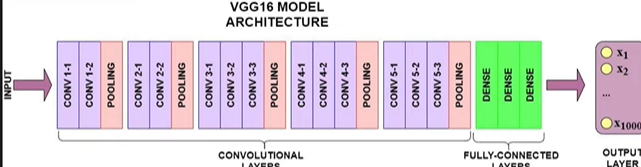
- The above model is a image classification model as we can see
- The convolution part caputures the image spatial info
- In the transfer learning we take the convolution model of the pretrained model and we create teh Fully connected model 
- The only part that is trained is the new part we added
--------------------
**Why does Transfer Learning works?**
- The convolution layers are used to extract the primitive features of the image
- The primitive features of the all the image classes are similar 
- That means we are only adding the new classes in the model.(We can only add the classification part (referencing the model))(inventing vechicle rather than the wheel).

### **Ways of doing Transfer Learning?**
- Feature extraction(We change the final fully connected layers only)
- Fine tunining(We train some parts of the end models also )

In [34]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [43]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)
conv_base.trainable=False

In [36]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [48]:
import os
import random
import shutil

# Define source directories for cats and dogs
cat_dir = './cat'
dog_dir = './dog'

# Define parent directories for sampled images
sampled_data_dir = './sampled_data'
sampled_cat_dir = os.path.join(sampled_data_dir, 'cat')
sampled_dog_dir = os.path.join(sampled_data_dir, 'dog')

test_data_dir = './test_data'
test_cat_dir = os.path.join(test_data_dir, 'cat')
test_dog_dir = os.path.join(test_data_dir, 'dog')

os.makedirs(sampled_cat_dir, exist_ok=True)
os.makedirs(sampled_dog_dir, exist_ok=True)
os.makedirs(test_cat_dir, exist_ok=True)
os.makedirs(test_dog_dir, exist_ok=True)

# Get list of images
cat_images = os.listdir(cat_dir)
dog_images = os.listdir(dog_dir)

# Shuffle and split into half for train and half for test
random.shuffle(cat_images)
random.shuffle(dog_images)
split_cats = len(cat_images)//4
split_dogs = len(dog_images)//4
train_cats = cat_images[:split_cats]
test_cats = cat_images[split_cats:]
train_dogs = dog_images[:split_dogs]
test_dogs = dog_images[split_dogs:]

# Copy images to train folders
for img in train_cats:
    shutil.copy(os.path.join(cat_dir, img), sampled_cat_dir)
for img in train_dogs:
    shutil.copy(os.path.join(dog_dir, img), sampled_dog_dir)

# Copy images to test folders
for img in test_cats:
    shutil.copy(os.path.join(cat_dir, img), test_cat_dir)
for img in test_dogs:
    shutil.copy(os.path.join(dog_dir, img), test_dog_dir)

# Now create datasets from these folders
train_ds = keras.utils.image_dataset_from_directory(
    directory=sampled_data_dir,
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(150, 150),
    shuffle=True,
    seed=123
)

test_ds = keras.utils.image_dataset_from_directory(
    directory=test_data_dir,
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(150, 150),
    shuffle=False
)

Found 432 files belonging to 2 classes.
Found 930 files belonging to 2 classes.


In [39]:
#normalize
def process(image,label):
    image=tensorflow.cast(image/255,tensorflow.float32)
    return image,label

train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

In [40]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [33]:
model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7751 - loss: 0.3764 - val_accuracy: 0.9746 - val_loss: 0.0977
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9839 - loss: 0.0447 - val_accuracy: 0.9772 - val_loss: 0.0543
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 0.9826 - val_loss: 0.0543
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 0.9772 - val_loss: 0.0584
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.9813 - val_loss: 0.0532
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9772 - val_loss: 0.0480
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 1.0000 - loss: 9.9950e-04 - val_accuracy: 0.9746 - val_loss: 0.0478
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 1.0000 - loss: 8.3249e-04 - val_accuracy: 0.9772 - val_loss: 0.0478


### **Doing finetuning**


In [44]:
conv_base.trainable=True
set_trainable=False

for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

for layer in conv_base.layers:
    print(layer.name,layer.trainable)
        

input_layer_8 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [45]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [46]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [49]:
model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.4907 - loss: 0.7374 - val_accuracy: 0.4914 - val_loss: 0.6933
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 825ms/step - accuracy: 0.4904 - loss: 0.6933

KeyboardInterrupt: 